# Logistic Regression

(before Multinomial logistic regression)
We want to predict the probability of an input belonging to one of two classes.

---


## Study case : 
Classify the zero and one digits from MNist dataset 

#### a) Dataset
- Input : Images of size 28*28 where a one or two is present
- Output : 0 if the input is a 0, 1 otherwise

#### b) Classifier
We use a logistic regression, 
(You may want to read this : http://cs229.stanford.edu/notes/cs229-notes1.pdf) :

The Cost is a function of the true output $Y$ and the prediction $p$, which itself is a function of a linear activation $s(x)$
- linear unit : $ s = (W^t \cdot X + b) $
- prediction : $ p(s) = \frac{1}{1 + e^{-s}} $
- Cost : $ C(y, p) = - y \ln(p) - (1-y)(\ln(1-p)) $

To use gradient descent, we have to compute the gradient of the cost with respect to w : 

$ \frac{dC}{dW} $

We take adventage of the chain rule :

$ \frac{dC}{dW} = \frac{dC}{dp} \cdot \frac{dp}{ds} \cdot \frac{ds}{dw} $

---

We derive each terms :
\begin{align}
\frac{dC}{dp} &= - \frac{y}{p} - (-1) \cdot \frac{1-y}{1-p} \\ 
&= - \frac{y}{p} + \frac{1-y}{1-p} \\
&= \frac{-y + y.p + p - y.p}{p \cdot (1-p)} \\
&= \frac{-y+p}{p \cdot (1-p)}
\end{align}

---

\begin{align}
\frac{dp}{ds} &= - \frac{-e^{-s}}{1 + e^{-s}} \\
&= \frac{-e^{-s}}{1 + e^{-s}} \\
&= \frac{e^{-s} + 1 - 1}{(1 + e^{-s})^2} \\
&= \frac{e^{-s} + 1}{(1 + e^{-s})^2} - \frac{1}{(1 + e^{-s})^2} \\
&= \frac{1}{1 + e^{-s}} - \left(\frac{1}{1 + e^{-s}}\right)^2 \\
&= p - p^2 \\
&= p \cdot (1-p)
\end{align}

---

\begin{align}
\frac{ds}{dw} = x
\end{align}

---

All together, we have :
\begin{align}
\frac{dC}{dW} &= \frac{dC}{dp} \cdot \frac{dp}{ds} \cdot \frac{ds}{dw} \\
&= \frac{-y+p}{p \cdot (1-p)} \cdot p \cdot (1-p) \cdot x \\
&= (-y+p) \cdot x \\
&= (p-y) \cdot x
\end{align}

## Dataset !
- Load it
- check it
- quick
- rewrite it

In [5]:
import keras
import utils
reload(utils)
from utils import *


# Get the input data
(x, y), (x_, y_) = keras.datasets.mnist.load_data()
X = x[np.where(y<=1)]
X = X.reshape(X.shape[0], -1)  # 2D image to 1D
X = X / 255  # Normalize inputs
Y = y[np.where(y<=1)]
Y = np.array(Y, dtype='int')

# Set-up the weights
W = np.random.random((784,))-.5


# Train
for _ in range(200):
    acc = []
    losses = []
    for x,y in zip(X, Y):
        pred = linear(x, W)
        pred = sigmoid(pred)
        acc.append(round(pred)==y)
        loss = nll(pred, y)
        losses.append(loss)
        update = (pred - y) * x 
        W = W - .02 * update
        
    print sum(acc) / float(len(acc)), sum(losses)/len(losses)

    


0.715436241611 0.530715691748
0.776865377023 0.44750746739
0.791630477694 0.41759199575
0.799921042242 0.399926379371
0.803395183577 0.387860727491
0.80757994473 0.378971782468
0.808922226609 0.372098490189
0.8098697197 0.366595614948
0.810738255034 0.362071465545
0.811369917094 0.358273630921
0.812396367943 0.355031608003
0.812870114489 0.352225681601
0.813580734307 0.349769064664
0.814291354126 0.347597138532
0.814370311883 0.345660692732
0.814212396368 0.343921521398
0.814607185156 0.342349463965
0.814923016186 0.340920361981
0.815317804974 0.33961461483
0.81579155152 0.338416137499
0.815712593762 0.337311594632
0.81579155152 0.336289828425
0.81579155152 0.335341425036
0.815870509278 0.334458381626
0.816028424793 0.333633847616
0.815870509278 0.332861921414
0.815949467035 0.332137489121
0.815870509278 0.331456095375
0.815870509278 0.330813839047
0.815870509278 0.330207288347
0.815949467035 0.329633411222
0.816186340308 0.329089517919
0.816344255823 0.328573213255
0.816581129096 0.32

In [ ]:
gen = batch_generator(1)
valid_gen = batch_generator(100)
X_valid, Y_valid = valid_gen.next()

W = np.random.normal(size=IMG_SIZE * IMG_SIZE)
b = np.random.normal()

log = lambda x: np.log(x + 1e-8)
exp = lambda x: np.exp(x + 1e-8)

alph_ = 1.6732632423543772848170429916717
lambd_ = 1.0507009873554804934193349852946
linear = lambda x: np.dot(W.T, x) + b
sigm = lambda x: 1 / (1 + exp(-x))
elu = lambda x, alpha: np.maximum(x, alpha * (exp(x) - 1))
selu = lambda x: lambd_ * elu(x, alph_)
nll = lambda p, y: - y * log(p) - (1 - y) * log(1 - p)


In [4]:
def prob(X):
    return sigm(linear(X))


def loss(X, y):
    # loss = -   y .ln(  sigm(WT.X+b))
    #        -(1-y).ln(1-sigm(WT.X+b))
    p = prob(X)
    return nll(p, y)


def gradient_loss(X, y):
    # d.loss / d.W = (p-y).X
    p = prob(X)
    return ((p - y) * X)


def evaluate():
    probs = np.array(map(prob, X_valid))
    loss = nll(probs, Y_valid)
    loss = loss.mean()
    probs = map(round, probs)
    accuracy = sum(probs == Y_valid)
    return accuracy, loss
    

losses = []
alpha = 0.001
for epoch in range(60):
    _loss = 0
    alpha *= 0.95
    for _ in range(2000):
        X, Y = gen.next()
        X, Y = X[0], Y[0]
        _loss += loss(X, Y) 
        W = W - alpha * gradient_loss(X, Y)
    losses.append(_loss / 2000)
    print epoch, losses[-1], evaluate(), alpha

0 5.58640704366 (50, 5.4980701891512709) 0.00095
1 4.78260540237 (49, 4.9118047612289111) 0.0009025
2 4.6779473795 (45, 4.6402717779130489) 0.000857375
3 4.19205914058 (51, 4.6260771507937468) 0.00081450625
4 4.18138088763 (46, 4.1006190950133581) 0.0007737809375
5 4.03061164749 (45, 4.4078093967995144) 0.000735091890625
6 4.00313752114 (45, 3.957636464813949) 0.000698337296094
7 4.00241508545 (49, 3.973483561712158) 0.000663420431289
8 4.00545516721 (51, 3.937356929954051) 0.000630249409725
9 3.81162025656 (49, 3.8196276208981157) 0.000598736939238
10 3.75474551368 (44, 3.7994947362272757) 0.000568800092276
11 3.67568308959 (51, 3.964439740141497) 0.000540360087663
12 3.42577373362 (48, 3.6926151078334852) 0.00051334208328
13 3.55937114202 (48, 3.7084235642235086) 0.000487674979116
14 3.41879286207 (46, 3.9666758384427658) 0.00046329123016
15 3.39976138532 (47, 3.5711137297466298) 0.000440126668652
16 3.3747754989 (48, 3.6306529687410336) 0.000418120335219
17 3.34353080411 (49, 3.5043

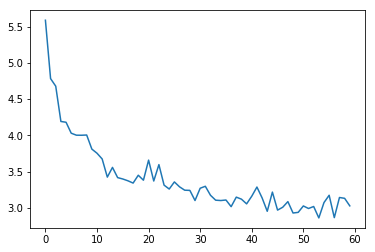

In [5]:
plt.plot(losses)
plt.show()

In [6]:
def prob(X):
    return sigm(selu(linear(X)))


def loss(X, y):
    # loss = -   y .ln(  sigm(WT.X+b))
    #        -(1-y).ln(1-sigm(WT.X+b))
    p = prob(X)
    return nll(p, y)


def gradient_loss(X, y):
    # d.loss / d.W = (p-y).X
    p = prob(X)
    if linear(X) <= 0:
        return X * (p - y) * (p + lambd_ * lambd_)
    else: 
        return X * (p - y) * lambd_


def evaluate():
    probs = np.array(map(prob, X_valid))
    loss = nll(probs, Y_valid)
    loss = loss.mean()
    probs = map(round, probs)
    accuracy = sum(probs == Y_valid)
    return accuracy, loss
    

losses = []
alpha = 0.001
for epoch in range(30):
    _loss = 0
    alpha *= 0.95
    for _ in range(2000):
        X, Y = gen.next()
        X, Y = X[0], Y[0]
        _loss += loss(X, Y)
        W = W - alpha * gradient_loss(X, Y)
    losses.append(_loss / 2000)
    print epoch, losses[-1], evaluate(), alpha

0 3.83802654556 (48, 4.4013385659404829) 0.00095
1 3.99140416499 (47, 4.2539705687866336) 0.0009025
2 3.89035629104 (46, 3.6237028880768731) 0.000857375
3 3.66249415031 (45, 4.8846913033125334) 0.00081450625
4 3.91929414034 (50, 4.0081923277662641) 0.0007737809375
5 3.85921859301 (46, 4.3803376646699403) 0.000735091890625
6 3.83240592633 (48, 4.0173954833909065) 0.000698337296094
7 3.66728704475 (48, 4.243323909749213) 0.000663420431289
8 3.67886858276 (44, 3.3552966672141293) 0.000630249409725
9 3.66690426904 (46, 3.9491893318703633) 0.000598736939238
10 3.93367755577 (46, 4.1890998085971374) 0.000568800092276
11 3.8107728032 (51, 5.6864281864492447) 0.000540360087663
12 3.60085335135 (50, 4.0974383676268342) 0.00051334208328
13 3.51783716129 (46, 4.2104113075881919) 0.000487674979116
14 3.87682400969 (49, 5.0915732144784833) 0.00046329123016
15 3.82137540006 (49, 5.4474757443576332) 0.000440126668652
16 3.63645619623 (44, 4.4993748975961321) 0.000418120335219
17 3.58141992227 (48, 4.

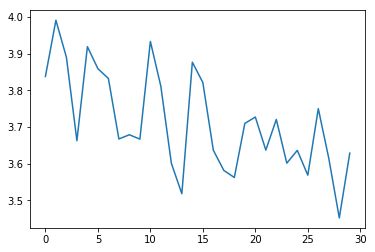

In [7]:
plt.plot(losses)
plt.show()